# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
sum(city_data_df["type"]== "Urban")

66

In [5]:
rural_total_rides = sum(city_data_df["type"]== "Rural") 
rural_total_rides

18

In [6]:
sum(city_data_df["type"]== "Suburban")

36

In [7]:
# 2. Get the total drivers for each city type
sum(city_data_df["driver_count"])

2973

In [8]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [9]:
total_urban_drivers = sum(urban_cities_df.groupby(["city"])["driver_count"].max())
total_urban_drivers

2405

In [10]:
total_suburban_drivers = sum(suburban_cities_df.groupby(["city"])["driver_count"].max())
total_suburban_drivers

490

In [11]:
total_rural_drivers = sum(rural_cities_df.groupby(["city"])["driver_count"].max())
total_rural_drivers

78

In [12]:
#total_urban_fare = urban_cities_df.groupby('type', sort = False, as_index=False) ['fare'].sum()
#total_urban_fare

total_urban_fare = urban_cities_df.groupby(["type"])["fare"].sum()
total_urban_fare


type
Urban    39854.38
Name: fare, dtype: float64

In [13]:
total_suburban_fare = suburban_cities_df.groupby(["type"])["fare"].sum()
total_suburban_fare

type
Suburban    19356.33
Name: fare, dtype: float64

In [14]:
total_rural_fare = rural_cities_df.groupby(["type"])["fare"].sum()
total_rural_fare

type
Rural    4327.93
Name: fare, dtype: float64

In [15]:
#Average fare per ride in rural city
r_avg_fare_ride = rural_cities_df.groupby(["type"])["fare"].mean()
r_avg_fare_ride

type
Rural    34.62344
Name: fare, dtype: float64

In [16]:
#Average fare per ride in urban city
u_avg_fare_ride = urban_cities_df.groupby(["type"])["fare"].mean()
u_avg_fare_ride

type
Urban    24.525772
Name: fare, dtype: float64

In [17]:
#Average fare per ride in suburban city
s_avg_fare_ride = suburban_cities_df.groupby(["type"])["fare"].mean()
s_avg_fare_ride

type
Suburban    30.970128
Name: fare, dtype: float64

In [18]:
#  5. Get the average fare per driver for each city type. 

avg_urbandriver_fare = total_urban_fare / total_urban_drivers
avg_urbandriver_fare


type
Urban    16.571468
Name: fare, dtype: float64

In [19]:
avg_suburbandriver_fare = total_suburban_fare / total_suburban_drivers
avg_suburbandriver_fare

type
Suburban    39.502714
Name: fare, dtype: float64

In [20]:
avg_ruraldriver_fare = total_rural_fare / total_rural_drivers
avg_ruraldriver_fare

type
Rural    55.486282
Name: fare, dtype: float64

In [21]:
rural_total_rides = rural_cities_df["ride_id"].count()
suburban_total_rides = suburban_cities_df["ride_id"].count()
urban_total_rides = urban_cities_df["ride_id"].count()

In [22]:
#  6. Create a PyBer summary DataFrame. 

pyber_table_index_r =["Rural"]

rural_df = pd.DataFrame({
    "City Type": pyber_table_index_r,
    "Total Rides": rural_total_rides,
    "Total Drivers":total_rural_drivers,
    "Total Fares": total_rural_fare,
    "Average Fare per Ride":r_avg_fare_ride,
    "Average Fare per Driver":avg_ruraldriver_fare
    
})

rural_df


,City Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,,
Rural,Rural,125,78,4327.93,34.62344,55.486282


In [23]:
pyber_table_index_u =["Urban"]

urban_df = pd.DataFrame({
    "City Type": pyber_table_index_u,
    "Total Rides": urban_total_rides,
    "Total Drivers":total_urban_drivers,
    "Total Fares": total_urban_fare,
    "Average Fare per Ride":u_avg_fare_ride,
    "Average Fare per Driver":avg_urbandriver_fare
    
})

urban_df


,City Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,,
Urban,Urban,1625,2405,39854.38,24.525772,16.571468


In [24]:
pyber_table_index_s =["Suburban"]
suburban_df = pd.DataFrame({
    "City Type": pyber_table_index_s,
    "Total Rides": suburban_total_rides,
    "Total Drivers":total_suburban_drivers,
    "Total Fares": total_suburban_fare,
    "Average Fare per Ride":s_avg_fare_ride,
    "Average Fare per Driver":avg_suburbandriver_fare
    
})

suburban_df


,City Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,,
Suburban,Suburban,625,490,19356.33,30.970128,39.502714


In [25]:
#  7. Cleaning up the DataFrame. Delete the index name
append1_df = rural_df.append(suburban_df, ignore_index = True)
pyber_summary_df = append1_df.append(urban_df, ignore_index = True)
pyber_summary_df.set_index('City Type', inplace=True)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [26]:
#  8. Format the columns.

pyber_summary_df["Total Rides"]= pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"]= pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)


In [27]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [28]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fare_by_type = pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_fare_by_type

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [29]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fare_by_type = pd.DataFrame(sum_fare_by_type).reset_index()
sum_fare_by_type.head(10)


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [30]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fare_by_type_pivot =sum_fare_by_type.pivot(index="date", columns="type")["fare"]
sum_fare_by_type_pivot.head(15)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [31]:
sum_fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [32]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
fares_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_April.head(20)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [33]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)

In [34]:
# 14. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [35]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_April.resample('W').sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


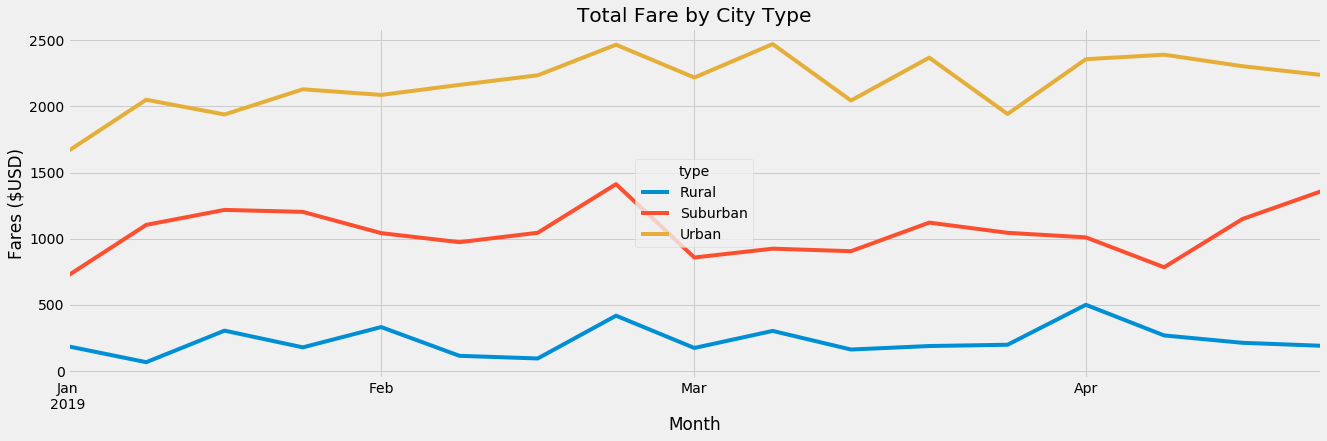

In [36]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


ax = weekly_fares_df.plot(figsize=(20,6))
ax.set_title("Total Fare by City Type")
ax.set_xlabel("Month")
ax.set_ylabel("Fares ($USD)")
plt.savefig("./Resources/Fare_summary.png")
plt.show()


